In [43]:
import pandas as pd
from myopic_mces import MCES, construct_graph
from myopic_mces.MCES_ILP import get_ilp_itself
from itertools import product
from tqdm.cli import tqdm
from IPython.display import clear_output
from functools import lru_cache
from myopic_mces import construct_graph
import pulp
import networkx as nx

# smiles_a, smiles_b = ['CC(=O)OC1=CC=CC=C1C(=O)O'], ['CN1C=NC2=C1C(=O)N(C(=O)N2C)C']
smiles_a, smiles_b = ['CC(=O)OC1=CC=CC=C1C(=O)O'], ['CN1C=NC2=C1C(=O)N(C(=O)N2C)C']
G1 = construct_graph(smiles_a[0])
G2 = construct_graph(smiles_b[0])
# nx.draw(h)

In [44]:
ilp = get_ilp_itself(G1, G2, -1)

In [39]:
len(ilp.variables()), len(ilp.constraints), ilp.objective

(134,
 432,
 0.5*edgepairs_((0,_1),_(4,_5)) + 0.5*edgepairs_((0,_1),_(5,_6)) + 1.0*edgepairs_((0,_1),__1) + 2.0*edgepairs_((1,_2),__1) + 1.0*edgepairs_((1,_3),_(6,_7)) + 1.0*edgepairs_((1,_3),_(9,_10)) + 1.0*edgepairs_((1,_3),__1) + 2.0*edgepairs_((10,_11),__1) + 1.0*edgepairs_((10,_12),_(6,_7)) + 1.0*edgepairs_((10,_12),_(9,_10)) + 1.0*edgepairs_((10,_12),__1) + 1.0*edgepairs_((3,_4),_(6,_7)) + 1.0*edgepairs_((3,_4),_(9,_10)) + 1.0*edgepairs_((3,_4),__1) + 1.5*edgepairs_((4,_5),__1) + 1.5*edgepairs_((4,_9),__1) + 1.5*edgepairs_((5,_6),__1) + 1.5*edgepairs_((6,_7),__1) + 1.5*edgepairs_((7,_8),__1) + 1.5*edgepairs_((8,_9),__1) + 0.5*edgepairs_((9,_10),_(4,_5)) + 0.5*edgepairs_((9,_10),_(5,_6)) + 1.0*edgepairs_((9,_10),__1) + 1.0*edgepairs_(_1,_(0,_1)) + 1.5*edgepairs_(_1,_(1,_2)) + 1.5*edgepairs_(_1,_(1,_5)) + 1.0*edgepairs_(_1,_(11,_12)) + 1.5*edgepairs_(_1,_(2,_3)) + 1.5*edgepairs_(_1,_(3,_4)) + 1.5*edgepairs_(_1,_(4,_11)) + 1.5*edgepairs_(_1,_(4,_5)) + 1.5*edgepairs_(_1,_(5,_6)) + 2.

In [40]:
d = ilp.toDict()
d.keys()

dict_keys(['objective', 'constraints', 'variables', 'parameters', 'sos1', 'sos2'])

In [41]:
d['objective']['coefficients'][:5]

[{'name': 'edgepairs_((0,_1),_(4,_5))', 'value': 0.5},
 {'name': 'edgepairs_((0,_1),_(5,_6))', 'value': 0.5},
 {'name': 'edgepairs_((1,_3),_(6,_7))', 'value': 1.0},
 {'name': 'edgepairs_((1,_3),_(9,_10))', 'value': 1.0},
 {'name': 'edgepairs_((3,_4),_(6,_7))', 'value': 1.0}]

In [45]:
ilp.solve()

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /home/tornikeo/micromamba/envs/pb/lib/python3.10/site-packages/pulp/solverdir/cbc/linux/64/cbc /tmp/013b0800d4b440f79f8fa04cf70fcd29-pulp.mps -timeMode elapsed -branch -printingOptions all -solution /tmp/013b0800d4b440f79f8fa04cf70fcd29-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 437 COLUMNS
At line 1427 RHS
At line 1860 BOUNDS
At line 1995 ENDATA
Problem MODEL has 432 rows, 134 columns and 683 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 27 - 0.00 seconds
Cgl0003I 0 fixed, 0 tightened bounds, 6 strengthened rows, 0 substitutions
Cgl0003I 0 fixed, 0 tightened bounds, 6 strengthened rows, 0 substitutions
Cgl0004I processed model has 92 rows, 81 columns (81 integer (81 of which binary)) and 327 elements
Cutoff increment increased from 1e-05 to 0.4999
Cbc0038I Initial state - 0 integers

1

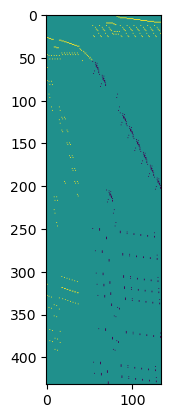

In [99]:
import matplotlib.pyplot as plt
import numpy as np
A = np.zeros((ilp.numConstraints(), ilp.numVariables()))
ub = np.zeros((ilp.numConstraints()))
c = np.zeros((ilp.numVariables()))
idx2var = {k:v for k,v in enumerate(ilp.variables())}
var2idx = {v:k for k,v in enumerate(ilp.variables())}
# ilp.variables()[:4], ilp.objective

for k,v in ilp.objective.items():
    i = var2idx[k]
    # print(i,k,v)
    c[i] = v
# c
for row, (_, v) in enumerate(ilp.constraints.items()):
    # lb, ub = v.getLb(), v.getUb()
    # print(lb,v,ub)
    for col, value in v.items():
        col = var2idx[col]
        A[row, col] = value
        ub[row] = v.getUb()
        # print(col,value)

plt.imshow(A)
# ub

In [ ]:
import numpy as np
c = -np.array([0, 1])
A = np.array([[-1, 1], [3, 2], [2, 3]])
b_u = np.array([1, 12, 12])
b_l = np.full_like(b_u, -np.inf, dtype=float)

In [18]:
ilp.constraints

OrderedDict([('_C1',
              1*nodepairs_(0,_0) + 1*nodepairs_(0,_12) + 1*nodepairs_(0,_13) + 1*nodepairs_(0,_2) + 1*nodepairs_(0,_4) + 1*nodepairs_(0,_5) + 1*nodepairs_(0,_6) + 1*nodepairs_(0,_9) + -1 <= 0),
             ('_C2',
              1*nodepairs_(1,_0) + 1*nodepairs_(1,_12) + 1*nodepairs_(1,_13) + 1*nodepairs_(1,_2) + 1*nodepairs_(1,_4) + 1*nodepairs_(1,_5) + 1*nodepairs_(1,_6) + 1*nodepairs_(1,_9) + -1 <= 0),
             ('_C3', 1*nodepairs_(2,_10) + 1*nodepairs_(2,_7) + -1 <= 0),
             ('_C4', 1*nodepairs_(3,_10) + 1*nodepairs_(3,_7) + -1 <= 0),
             ('_C5',
              1*nodepairs_(4,_0) + 1*nodepairs_(4,_12) + 1*nodepairs_(4,_13) + 1*nodepairs_(4,_2) + 1*nodepairs_(4,_4) + 1*nodepairs_(4,_5) + 1*nodepairs_(4,_6) + 1*nodepairs_(4,_9) + -1 <= 0),
             ('_C6',
              1*nodepairs_(5,_0) + 1*nodepairs_(5,_12) + 1*nodepairs_(5,_13) + 1*nodepairs_(5,_2) + 1*nodepairs_(5,_4) + 1*nodepairs_(5,_5) + 1*nodepairs_(5,_6) + 1*nodepairs_(5,_9) + -1

In [100]:
import numpy as np

def fastLP(A, c, b, K):
    # Set parameters
    m, n = A.shape
    d = b / n
    step = 1 / np.sqrt(K * n)
    
    # Set initial solutions
    x = np.zeros(n)
    y = np.zeros(m)
    
    # Set the initial scaled remaining inventory
    br = K * b
    
    for k in range(K):
        p = np.random.permutation(n)
        
        for i in range(n):
            ii = p[i]
            aa = A[:, ii]
            
            # Set the primal increment
            xk = (np.sign(c[ii] - np.dot(aa, y)) + 1) / 2
            
            # Update the dual solution
            y = np.maximum(0, y + step * (xk * aa - d))
            
            # Update the remaining inventory and primal solution
            if np.min(br - xk * aa) >= 0:
                br -= xk * aa
                x[ii] += xk
    
    x /= K
    
    return x, y


In [107]:
x,y = fastLP(A, c, ub, 10)
x.sum()

np.float64(34.45)